# [RQ5] In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('2019-Oct.csv', header='infer',
                      parse_dates = ['event_time'],
                      date_parser=pd.to_datetime,
                     nrows=2000000)

In [4]:
dataset_02 = pd.read_csv('2019-Nov.csv', header='infer',
                      parse_dates = ['event_time'],
                      date_parser=pd.to_datetime,
                     nrows=2000000)

In [5]:
frames = [dataset, dataset_02]

In [6]:
all_dataset = pd.concat(frames)

#### In what part of the day is your store most visited? 

In [7]:
dataset_view = all_dataset[all_dataset.event_type == 'view']

In [8]:
count_view_hour = dataset_view.groupby([dataset_view.event_time.dt.hour]).event_time.count()
dataset_view.groupby([dataset_view.event_time.dt.hour]).event_time.count()

event_time
0      32552
1      53399
2     123051
3     192166
4     230729
5     268755
6     282316
7     288605
8     289950
9     240471
10    198272
11    186603
12    186204
13    205311
14    187821
15    189350
16    200050
17    178861
18    137287
19     92183
20     51010
21     30464
22     17820
23     13933
Name: event_time, dtype: int64

In [72]:
hour_indexes = np.arange(0,24)
hour_indexes_visited = zip(count_view_hour, hour_indexes)
hour_most_visited = max(hour_indexes_visited)
print(f'In what part of the day is your store most visited? {hour_most_visited[1]} o\'clock')
print(f'Number of views: {hour_most_visited[0]}')

In what part of the day is your store most visited? 8 o'clock
Number of views: 289950


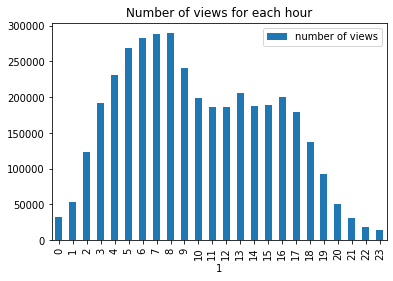

In [78]:
df = pd.DataFrame(list(zip(count_view_hour, hour_indexes))).set_index(1)
ax = df.plot(kind='bar', title = 'Number of views for each hour')
ax.legend(["number of views"]);

#### Create a plot that for each day of the week show the hourly average of visitors your store has. 

In [82]:
num_days = []
average_visitors = []

for wkday, frame in dataset_view.groupby([dataset_view.event_time.dt.weekday]):
    #print(f"Weekday: {wkday!r}")
    num_days.append(wkday)
    #print(frame.groupby([dataset.event_time.dt.hour]).event_time.count().mean())
    average_visitors.append(frame.groupby([dataset.event_time.dt.hour]).event_time.count().mean())
    

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
my_zip = zip(weekday, average_visitors)
for i in my_zip:
    print(i)

('Monday', 50345.0)
('Tuesday', 48560.4)
('Wednesday', 58499.625)
('Thursday', 53648.6)


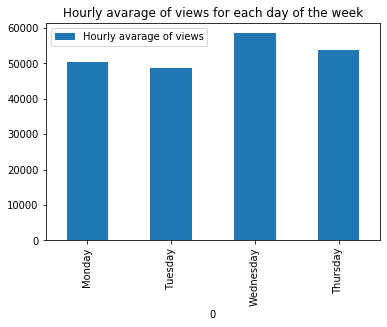

In [85]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df = pd.DataFrame(list(zip(weekday, average_visitors))).set_index(0)
ax = df.plot(kind='bar', title = 'Hourly avarage of views for each day of the week')
ax.legend(["Hourly avarage of views"]);